# **Немного поговорим про кофе!**

Проект подготовила Савина Анастасия Олеговна, группа № 3.

Люблю кофе, поэтому нашла датасет на эту тему, на kaggle.
Cсылочка будет ниже)

https://www.kaggle.com/datasets/adampq/coffee-quality-with-locations-of-origin?select=Coffee_Qlty.csv

Вначале сделаем разведочный анализ данных, порисуем милые графики для наглядности. Анализировать и строить взаимосвязи будем по разым признакам. Точно планирую посмотреть связь между годом урожая и страной происхождения, потому что эта информация может помочь выставить оптимальную цену на кофе. То есть, например, нам говорят, эта поставка кофе из такой-то страны урожай такого-то года. Мы проведи анализ и поняли что нас обманывают потому что допустим поставки из определенной страны были небольшие.

In [1]:
import warnings

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

warnings.filterwarnings("ignore")
plt.style.use("seaborn")

In [2]:
df = pd.read_csv('/content/Coffee_Qlty.csv', encoding='latin-1')
df.head()

,REC_ID,Species,Continent.of.Origin,Country.of.Origin,Harvest.Year,Expiration,Variety,Color,Processing.Method,Aroma,...,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Moisture,Quakers,Category.One.Defects,Category.Two.Defects
0,0,Arabica,Africa,Ethiopia,2014.0,04/03/16,NaN,Green,Washed / Wet,8.67,...,8.75,8.50,8.42,10.0,10.0,10.0,0.12,0,0,0
1,1,Arabica,Africa,Ethiopia,2014.0,04/03/16,Other,Green,Washed / Wet,8.75,...,8.58,8.42,8.42,10.0,10.0,10.0,0.12,0,0,1
2,2,Arabica,North America,Guatemala,NaN,05/31/11,Bourbon,NaN,NaN,8.42,...,8.42,8.33,8.42,10.0,10.0,10.0,0.00,0,0,0
3,3,Arabica,Africa,Ethiopia,2014.0,03/25/16,NaN,Green,Natural / Dry,8.17,...,8.42,8.50,8.25,10.0,10.0,10.0,0.11,0,0,2
4,4,Arabica,Africa,Ethiopia,2014.0,04/03/16,Other,Green,Washed / Wet,8.25,...,8.50,8.42,8.33,10.0,10.0,10.0,0.12,0,0,2


Вот такие есть показатели и их смысл:

**REC_ID** : Refers to the unique database ID
**Species** : Refers to the botanical species of the coffee beans, such as Arabica or Robusta.
**Continent.of.Origin** : Refers to the continent of origin for the respective coffee lot record.
**Country.of.Origin** : Refers to the country of origin for the respective coffee lot record.
**Harvest.Year** : Refers to the year harvested for the respective coffee lot record.
**Expiration**: Refers to the assigned expiration date for the respective coffee lot record.
**Variety**: Refers to the specific cultivar or type of coffee plant from which the beans are harvested.
**Color** : Refers to the observed color of raw coffee bean. Typically blue, green, or mixed.
**Processing.Method**: Describes the method used to process the coffee beans after harvesting.
**Aroma**: Refers to the scent or fragrance of the coffee.
**Flavor**: Evaluated based on the taste, including any sweetness, bitterness, acidity, and other flavor notes.
**Aftertaste**: Refers to the lingering taste that remains in the mouth after swallowing the coffee.
**Acidity** : Refers to the brightness or liveliness of the taste.
**Body** : Refers to the thickness or viscosity of the coffee in the mouth
**Balance** : Refers to how well the different flavor components of the coffee work together.
**Uniformity**: Refers to the consistency of the coffee from cup to cup.
**Clean.Cup**: Refers to a coffee that is free of any off-flavors or defects, such as sourness, mustiness, or staleness.
**Sweetness**: Refers to the pallet of sweetness offered by its taste
Moisture : Represents the moisture content of the coffee beans, typically measured as a percentage.
**Quakers** : Indicates the presence of quaker beans, which are unripe or defective beans that fail to roast properly.
**Category.One.Defects** : Refers to the total number of first level defects, such as black or sour beans.
**Category.Two.Defects** : Refers to the total number of second level defects, including more severe defects like moldy, insect-damaged, or perforated beans.
**Rec_Cnt (Grouped by data sets only)**: Refers to the total record count for each of the respective location bins

In [3]:
df.describe()

,REC_ID,Harvest.Year,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Moisture,Quakers,Category.One.Defects,Category.Two.Defects
count,1339.000000,1279.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000
mean,669.000000,2013.567631,7.566706,7.520426,7.401083,7.535706,7.517498,7.518013,9.834877,9.835108,9.856692,0.088379,0.173264,0.479462,3.556385
std,386.680316,1.808496,0.377560,0.398442,0.404463,0.379827,0.370064,0.408943,0.554591,0.763946,0.616102,0.048287,0.831824,2.549683,5.312541
min,0.000000,2009.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,334.500000,2012.000000,7.420000,7.330000,7.250000,7.330000,7.330000,7.330000,10.000000,10.000000,10.000000,0.090000,0.000000,0.000000,0.000000
50%,669.000000,2013.000000,7.580000,7.580000,7.420000,7.580000,7.500000,7.500000,10.000000,10.000000,10.000000,0.110000,0.000000,0.000000,2.000000
75%,1003.500000,2015.000000,7.750000,7.750000,7.580000,7.750000,7.670000,7.750000,10.000000,10.000000,10.000000,0.120000,0.000000,0.000000,4.000000
max,1338.000000,2018.000000,8.750000,8.830000,8.670000,8.750000,8.580000,8.750000,10.000000,10.000000,10.000000,0.280000,11.000000,63.000000,55.000000


In [4]:
df.dtypes

REC_ID                    int64
Species                  object
Continent.of.Origin      object
Country.of.Origin        object
Harvest.Year            float64
Expiration               object
Variety                  object
Color                    object
Processing.Method        object
Aroma                   float64
Flavor                  float64
Aftertaste              float64
Acidity                 float64
Body                    float64
Balance                 float64
Uniformity              float64
Clean.Cup               float64
Sweetness               float64
Moisture                float64
Quakers                   int64
Category.One.Defects      int64
Category.Two.Defects      int64
dtype: object

In [5]:
df.isna().sum()

REC_ID                    0
Species                   0
Continent.of.Origin       1
Country.of.Origin         1
Harvest.Year             60
Expiration                0
Variety                 226
Color                   270
Processing.Method       170
Aroma                     0
Flavor                    0
Aftertaste                0
Acidity                   0
Body                      0
Balance                   0
Uniformity                0
Clean.Cup                 0
Sweetness                 0
Moisture                  0
Quakers                   0
Category.One.Defects      0
Category.Two.Defects      0
dtype: int64

C учетом полученных результатов точно нужно удалить колонку Color. Дополнительно удалю колонку Variety, потому что в этих клонках много пропусков

In [6]:
df.drop(['Color', 'Variety'], axis= 1 , inplace= True )

In [7]:
df.head()

,REC_ID,Species,Continent.of.Origin,Country.of.Origin,Harvest.Year,Expiration,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Moisture,Quakers,Category.One.Defects,Category.Two.Defects
0,0,Arabica,Africa,Ethiopia,2014.0,04/03/16,Washed / Wet,8.67,8.83,8.67,8.75,8.50,8.42,10.0,10.0,10.0,0.12,0,0,0
1,1,Arabica,Africa,Ethiopia,2014.0,04/03/16,Washed / Wet,8.75,8.67,8.50,8.58,8.42,8.42,10.0,10.0,10.0,0.12,0,0,1
2,2,Arabica,North America,Guatemala,NaN,05/31/11,NaN,8.42,8.50,8.42,8.42,8.33,8.42,10.0,10.0,10.0,0.00,0,0,0
3,3,Arabica,Africa,Ethiopia,2014.0,03/25/16,Natural / Dry,8.17,8.58,8.42,8.42,8.50,8.25,10.0,10.0,10.0,0.11,0,0,2
4,4,Arabica,Africa,Ethiopia,2014.0,04/03/16,Washed / Wet,8.25,8.50,8.25,8.50,8.42,8.33,10.0,10.0,10.0,0.12,0,0,2


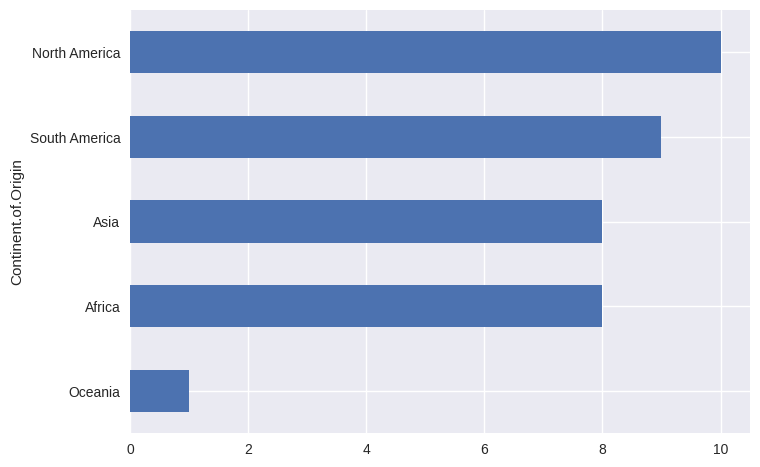

In [8]:
df.groupby("Continent.of.Origin")["Harvest.Year"].nunique().sort_values().plot(kind="barh");

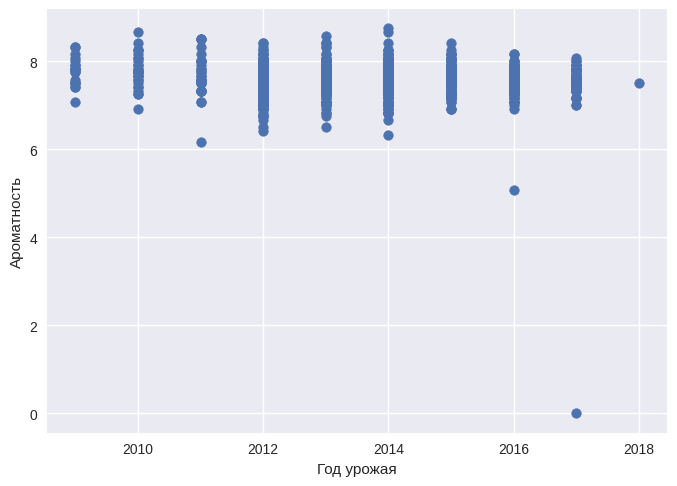

In [9]:
plt.scatter(df["Harvest.Year"], df["Aroma"]);
plt.xlabel('Год урожая')
plt.ylabel('Ароматность');

Самыми ароматными можно назвать 2009 и 2016 год, использовать эту информацию могут кофейни, когда закупают кофе, например, если кофе 2016 года, то прибыль скорее всего будет получше, чем если кофе выращено в 2014 году, так как его приятнее пить

In [10]:
colnames = df.dtypes[df.dtypes == 'float64'].index.values
df[colnames].corr(method='pearson')

,Harvest.Year,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Moisture
Harvest.Year,1.000000,-0.060966,-0.035557,-0.047159,-0.054811,-0.058808,-0.055335,-0.002278,0.043953,-0.006075,-0.088366
Aroma,-0.060966,1.000000,0.813259,0.777056,0.723582,0.673006,0.708634,0.366578,0.335684,0.253493,-0.134127
Flavor,-0.035557,0.813259,1.000000,0.895672,0.816688,0.735720,0.792290,0.410923,0.396958,0.291065,-0.145201
Aftertaste,-0.047159,0.777056,0.895672,1.000000,0.792255,0.734306,0.809639,0.401456,0.386665,0.266409,-0.180510
Acidity,-0.054811,0.723582,0.816688,0.792255,1.000000,0.706435,0.733017,0.375383,0.300927,0.261854,-0.129079
Body,-0.058808,0.673006,0.735720,0.734306,0.706435,1.000000,0.757597,0.326879,0.276587,0.268342,-0.147651
Balance,-0.055335,0.708634,0.792290,0.809639,0.733017,0.757597,1.000000,0.400915,0.370341,0.283272,-0.199843
Uniformity,-0.002278,0.366578,0.410923,0.401456,0.375383,0.326879,0.400915,1.000000,0.526219,0.451083,0.013792
Clean.Cup,0.043953,0.335684,0.396958,0.386665,0.300927,0.276587,0.370341,0.526219,1.000000,0.440644,-0.014916
Sweetness,-0.006075,0.253493,0.291065,0.266409,0.261854,0.268342,0.283272,0.451083,0.440644,1.000000,0.072699


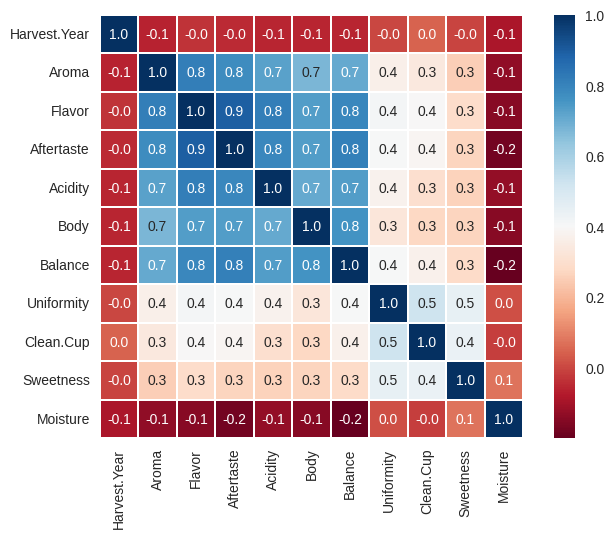

In [11]:
sns.heatmap(df[colnames].corr(method='pearson'),
            square=True, annot=True, fmt=".1f",
            linewidths=0.1, cmap="RdBu");

Самая сильная взаимосвязь у Flavor и Aftertaste, а также например, у Flavor с Aroma, Acidity, Balance. Из интересного много у кого много с кем больщая корреляция, есть отрицательная связь, такая как, у Balance c Moisture

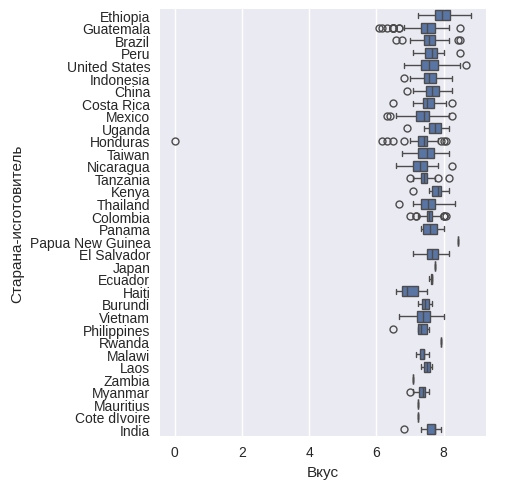

In [12]:
sns.catplot(x="Flavor", y="Country.of.Origin", data=df, kind="box")
plt.xlabel('Вкус')
plt.ylabel('Старана-исготовитель');
plt.show()

На вкус и цвет-товарищей нет, но самый большая разница во вкусе у кофе из Мексики

# Сreate новые признаки

создадим признак, который будет характеризовать, когда произведен кофе, а именно до санкций 2014 или после них

In [13]:
import numpy as np


In [14]:
df['When'] = np.where(df['Harvest.Year']>2014, 1, 0)

In [15]:
df.head()

,REC_ID,Species,Continent.of.Origin,Country.of.Origin,Harvest.Year,Expiration,Processing.Method,Aroma,Flavor,Aftertaste,...,Body,Balance,Uniformity,Clean.Cup,Sweetness,Moisture,Quakers,Category.One.Defects,Category.Two.Defects,When
0,0,Arabica,Africa,Ethiopia,2014.0,04/03/16,Washed / Wet,8.67,8.83,8.67,...,8.50,8.42,10.0,10.0,10.0,0.12,0,0,0,0
1,1,Arabica,Africa,Ethiopia,2014.0,04/03/16,Washed / Wet,8.75,8.67,8.50,...,8.42,8.42,10.0,10.0,10.0,0.12,0,0,1,0
2,2,Arabica,North America,Guatemala,NaN,05/31/11,NaN,8.42,8.50,8.42,...,8.33,8.42,10.0,10.0,10.0,0.00,0,0,0,0
3,3,Arabica,Africa,Ethiopia,2014.0,03/25/16,Natural / Dry,8.17,8.58,8.42,...,8.50,8.25,10.0,10.0,10.0,0.11,0,0,2,0
4,4,Arabica,Africa,Ethiopia,2014.0,04/03/16,Washed / Wet,8.25,8.50,8.25,...,8.42,8.33,10.0,10.0,10.0,0.12,0,0,2,0


Поредачим дату

In [49]:
df["Expiration"] = df["Expiration"].dt.floor("D")

In [50]:
df.head()

,REC_ID,Species,Continent.of.Origin,Country.of.Origin,Harvest.Year,Expiration,Processing.Method,Aroma,Flavor,Aftertaste,...,Body,Balance,Uniformity,Clean.Cup,Sweetness,Moisture,Quakers,Category.One.Defects,Category.Two.Defects,When
0,0,Arabica,Africa,Ethiopia,2014.0,2006-11-21,Washed / Wet,8.67,8.83,8.67,...,8.50,8.42,10.0,10.0,10.0,0.12,0,0,0,0
1,1,Arabica,Africa,Ethiopia,2014.0,2006-11-21,Washed / Wet,8.75,8.67,8.50,...,8.42,8.42,10.0,10.0,10.0,0.12,0,0,1,0
2,2,Arabica,North America,Guatemala,NaN,2006-11-21,NaN,8.42,8.50,8.42,...,8.33,8.42,10.0,10.0,10.0,0.00,0,0,0,0
3,3,Arabica,Africa,Ethiopia,2014.0,2006-11-21,Natural / Dry,8.17,8.58,8.42,...,8.50,8.25,10.0,10.0,10.0,0.11,0,0,2,0
4,4,Arabica,Africa,Ethiopia,2014.0,2006-11-21,Washed / Wet,8.25,8.50,8.25,...,8.42,8.33,10.0,10.0,10.0,0.12,0,0,2,0


# Гипотезы, гипнотезы)

Бип-бип с дороги! Это функция для проверки гипотез подкатила

In [16]:
from scipy import stats
import statsmodels as sts
import matplotlib.pyplot as plt
from tqdm import tqdm
import math

In [17]:
def asy_mean_test(mean_hat, std_hat, mu_0=0,
                   alpha=0.05, alternative='two-sided', margin=3):
    """
        Асимптотический тест для равенства средних
    """

    z_obs = (mean_hat - mu_0)/std_hat

    if alternative == 'two-sided':
        p_value = 2 * (1 - stats.norm().cdf(np.abs(z_obs)))
        z_crit = stats.norm().ppf(1 - alpha/2)

        statistics = ['-z_crit', 'z_crit', '-z_obs', 'z_obs']
        params = dict(zip(statistics, [(-z_crit, -0.6, -margin, -z_crit, 'b'),
                                       (z_crit, 0.05, z_crit, margin, 'b'),
                                       (-z_obs, -0.6, -margin, -z_obs, 'r'),
                                       (z_obs, 0.1, z_obs, margin, 'r')]))

    if alternative == 'less':
        p_value = stats.norm().cdf(z_obs)
        z_crit = stats.norm().ppf(1 - alpha)

        statistics = ['-z_crit', '-z_obs']
        params = dict(zip(statistics, [(-z_crit, -0.6, -margin, -z_crit, 'b'),
                                       (-z_obs, -0.6, -margin, -z_obs, 'r')]))

    if alternative == 'larger':
        p_value = 1 - stats.norm().cdf(z_obs)
        z_crit = stats.norm().ppf(1 - alpha)

        statistics = ['z_crit', 'z_obs']
        params = dict(zip(statistics, [(z_crit, 0.05, z_crit, margin, 'b'),
                                       (z_obs, 0.1, z_obs, margin, 'r')]))


    plt.figure(figsize = (8, 4))
    x = np.linspace(-margin, margin)
    pdf = stats.norm().pdf(x)

    plt.plot(x, pdf, color="black")
    plt.ylabel("$f(x)$", fontsize=16)
    plt.xlabel("$x$", fontsize=16)
    y_max = plt.ylim()[1]

    for i in range(len(statistics)):
        statistic, text_margin, left_bound, right_bound, color = params[statistics[i]]

        plt.axvline(statistic, color=color, linestyle="--", lw=2)
        h = 0.8 if statistics[i].split('_')[-1] == 'crit' else 0.6
        plt.text(statistic + text_margin,
                 h*y_max, round(statistic, 2), color=color, fontsize=16)

        xq = np.linspace(left_bound, right_bound)
        yq = stats.norm().pdf(xq)
        plt.fill_between(xq, 0, yq, color=color, alpha=0.2)

    return p_value

*Предположим, что санкции 2014 года (т.е. 'when' == 1), оказывают влияние на послевкусие*

In [18]:
x = df['When']
y = df['Aftertaste']

diff = x.mean() - y.mean()
nx, ny = x.size, y.size
diff_sd = np.sqrt(x.var(ddof=1)/nx + y.var(ddof=1)/nx)

left, right = stats.norm.interval(0.95, loc=diff, scale=diff_sd)
print("Доверительный интервал [{:.4}; {:.4}] ширины {:.4}".format(left, right, right - left))

Доверительный интервал [-7.151; -7.086] ширины 0.06484


In [19]:
alpha = 0.05
x = df['When']
y = df['Aftertaste']

diff = x.mean() - y.mean()
nx, ny = x.size, y.size
diff_std = np.sqrt(x.var(ddof=1)/nx + y.var(ddof=1)/nx)

z_obs = diff/diff_std
z_crit = stats.norm.ppf(1 - alpha/2)

print(f'{z_obs:.3} попадает в ({-z_crit:.3} , {z_crit:.3}) => Нулевая гипотеза НЕ отвергается')

-4.3e+02 попадает в (-1.96 , 1.96) => Нулевая гипотеза НЕ отвергается


# Аналитика

План:
-логистическая регрессия

Мысли:
 в самом начале писала про интерес по стране происхождения примерно предсказывать год урожая, по консестенции (uniformity) узнать ароматность кофе

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
X = df['Uniformity'].values.reshape(-1, 1)
y = df['Aroma'].values.reshape(-1, 1)
m1 = LinearRegression()
lr = m1.fit(X, y)
y_pred = lr.predict(X)
mean_squared_error(y, y_pred).round(2)

0.12

Ошибка маленькая, значит предсказать ароматность по консестенции можно замечательно

Sweetness пусть будет тем, почему будем предсказывать Flavor

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
X = df['Sweetness'].values.reshape(-1, 1)
y = df['Flavor'].values.reshape(-1, 1)
m1 = LinearRegression()
lr = m1.fit(X, y)
y_pred = lr.predict(X)
mean_absolute_error(y, y_pred).round(2)

0.26

Ошибка небольшая, модель предсказывает достаточно хорошо

In [56]:
pd.get_dummies(df['Country.of.Origin']).head()


,Brazil,Burundi,China,Colombia,Costa Rica,Cote dIvoire,Ecuador,El Salvador,Ethiopia,Guatemala,...,Peru,Philippines,Rwanda,Taiwan,Tanzania,Thailand,Uganda,United States,Vietnam,Zambia
0,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [57]:
categorical_features = ['Species','Continent.of.Origin','Processing.Method' ]

numeric_features = ['Harvest.Year',	'Aroma', 'Flavor',	'Aftertaste',	'Acidity',	'Body',	'Balance',	'Uniformity',	'Clean.Cup',	'Sweetness',	'Continent.of.Origin']

target = 'Country.of.Origin'

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
X = df['Country.of.Origin'].values.reshape(-1, 1)
y = df['Harvest.Year'].values.reshape(-1, 1)
m1 = LinearRegression()
lr = m1.fit(X, y)
y_pred = lr.predict(X)
mean_squared_error(y, y_pred).round(2)

ValueError: could not convert string to float: 'Ethiopia'

Чем Ефиопия не угодила вопрос интересный)

Как говорится, кофе не задает вопросов - кофе понимает